In [1]:
# INTEL CORPORATION CONFIDENTIAL AND PROPRIETARY
# 
# Copyright © 2018-2021 Intel Corporation.n# 
# This software and the related documents are Intel copyrighted
# materials, and your use of them is governed by the express 
# license under which they were provided to you (License). Unless
# the License provides otherwise, you may not use, modify, copy, 
# publish, distribute, disclose or transmit  this software or the
# related documents without Intel's prior written permission.
# 
# This software and the related documents are provided as is, with
# no express or implied warranties, other than those that are 
# expressly stated in the License.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nxsdk_modules.lca as lca

# Initialization

In [3]:
re = lca.ResourceEstimator(numWgtBits=4,
                           useMultiChip=False,
                           popMsgSize=32)

# Resource estimation
## Dictionary size variation
Note: The horizontal red, green and blue lines in the 'numCores' diagram corresponds to a single chip of 128 cores, 4 chips of 512 cores and 32 chips with 4096 cores.

As the dictionary size increases either the synaptic or axonal resources occasionally reach their maximum values which requires a reduction of the neurons assigned to an individual core. This results in more aggressive slicing and distributing neuron groups over more cores. 
When the synaptic resources are maxed out then the number of neurons per slice and thus per core must be reduced. In general, this would allow to place more slices of different neuron groups on the same core that share the same synaptic resources. Howeve, due to a hardware bug, the maximum number of neuron groups per core is 16 which leads to a net decrease of neurons per core as the dictionary size increases.
When the axonal resources are maxed out then the number of different neuron groups per core must be reduced as only that allows to reduce the shared axonal resources per group which leads to a further reduction of neurons per core.

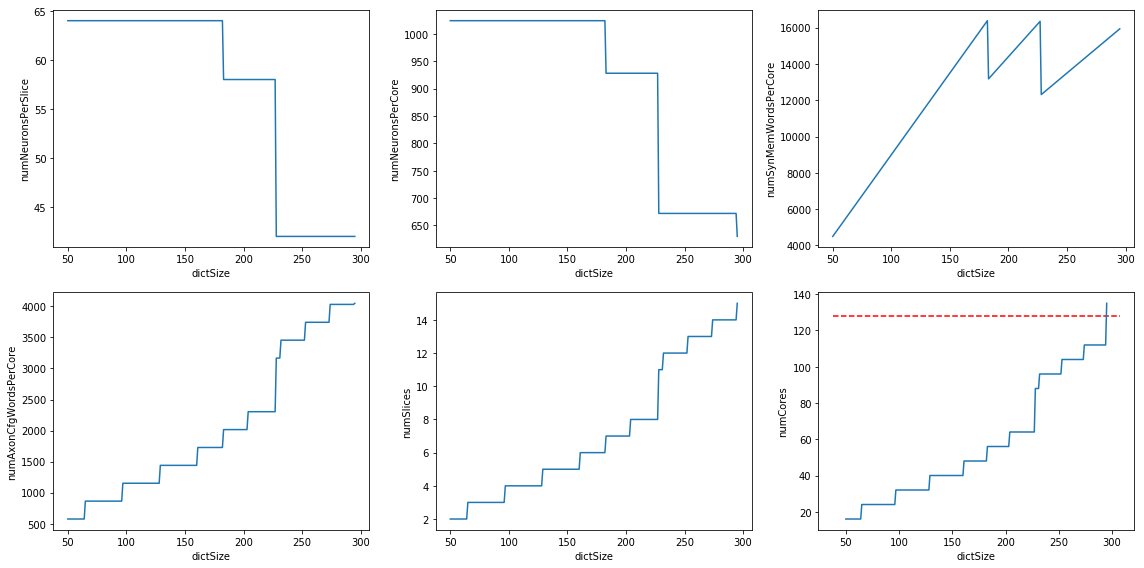

In [4]:
plt.figure(figsize=(16,8))
res = re.sweepDictSize(dictSizes=range(50, 296),
                       imgSize=48,
                       patchSize=8,
                       strideSize=4,
                       showSweep=True)

## Image size variation
Note: The horizontal red line in the 'numCores' diagram corresponds to a single chip of 128 cores while the green line corresponds to 32 chips of 128 cores.

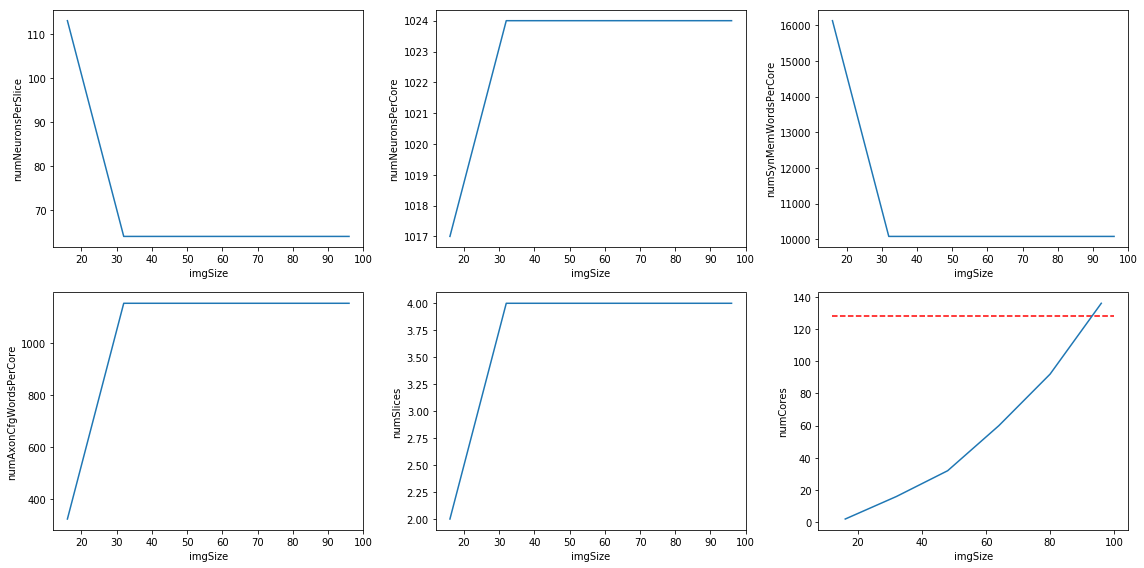

In [5]:
plt.figure(figsize=(16,8))
_ = re.sweepImgSize(dictSize=112,
                    imgSizes=range(16,100,16),
                    patchSize=8,
                    strideSize=4,
                    showSweep=True)

## Patch to stride ratio variation
Note: The horizontal red line in the 'numCores' diagram corresponds to a single chip of 128 cores while the green line corresponds to 32 chips of 128 cores.

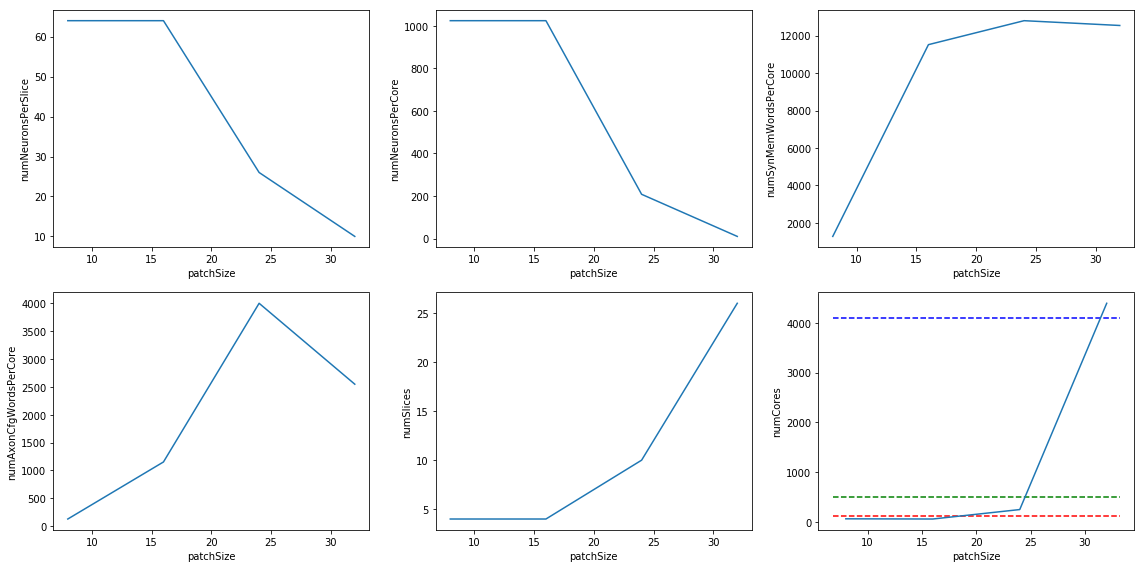

In [6]:
plt.figure(figsize=(16,8))
_ = re.sweepPatchSize(dictSize=128,
                      imgSize=128,
                      patchSizes=[8, 16, 24, 32],
                      strideSize=8,
                      showSweep=True)

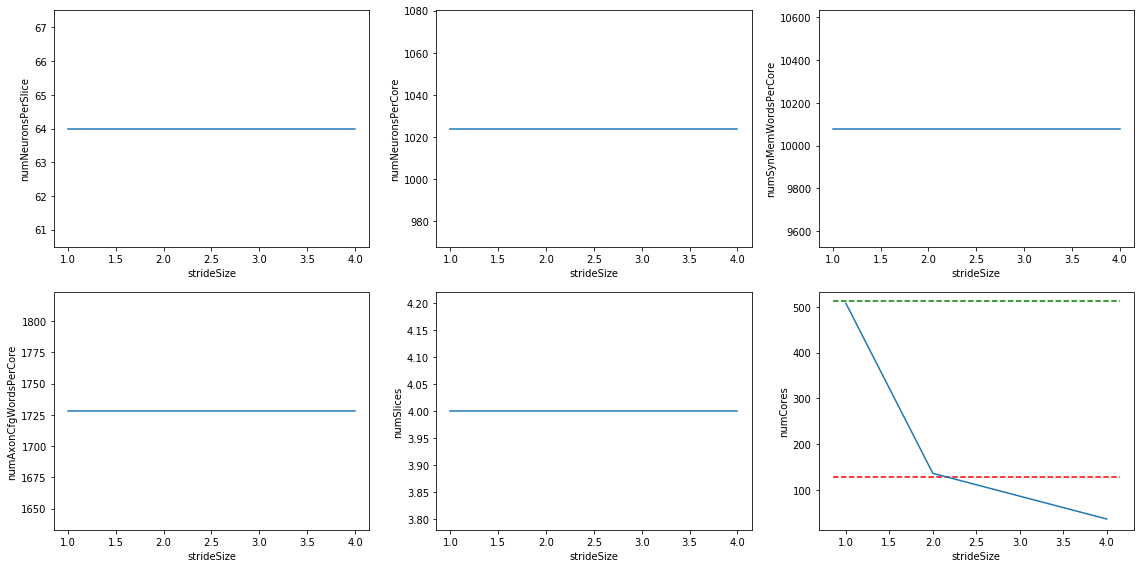

In [17]:
# maxConnectionDistance controls the distance between overlapping patches in units of strideSize between which 
# inhibitory connections are created
re = lca.ResourceEstimator(numWgtBits=4,
                           useMultiChip=True,
                           popMsgSize=32,
                           maxConnectionDistance=1)
plt.figure(figsize=(16,8))
_ = re.sweepStrideSize(dictSize=112,
                      imgSize=52,
                      patchSize=8,
                      strideSizes=[1, 2, 4],
                      showSweep=True)

## maxNumNeuronsPerCore variation

In [ ]:
re = lca.ResourceEstimator(numWgtBits=4,
                           useMultiChip=False,
                           popMsgSize=32,
                           maxNumNeuronGroupsPerCore=16)

plt.figure(figsize=(16,8))
res = re.sweepMaxNumNeurons(
    maxNumNeurons=[1024, 512+256, 512, 256+128, 256, 128+64, 128],
    dictSize=182,
    imgSize=76,
    patchSize=8,
    strideSize=4,
    showSweep=True,
    numCoresPerChip=126)

In [ ]:
re = lca.ResourceEstimator(numWgtBits=4,
                           useMultiChip=False,
                           popMsgSize=32,
                           maxNumNeuronGroupsPerCore=8)

plt.figure(figsize=(16,8))
res = re.sweepMaxNumNeurons(
    maxNumNeurons=[1024, 512+256, 512, 256+128, 256, 128+64, 128, 64+32],
    dictSize=182,
    imgSize=76,
    patchSize=8,
    strideSize=4,
    showSweep=True)

In [ ]:
re = lca.ResourceEstimator(numWgtBits=4,
                           useMultiChip=False,
                           popMsgSize=32,
                           maxNumNeuronGroupsPerCore=4)

plt.figure(figsize=(16,8))
res = re.sweepMaxNumNeurons(
    maxNumNeurons=[1024, 512, 256, 128, 64, 32],
    dictSize=182,
    imgSize=76,
    patchSize=8,
    strideSize=4,
    showSweep=True)

In [ ]:
re = lca.ResourceEstimator(numWgtBits=4,
                           useMultiChip=False,
                           popMsgSize=32,
                           maxNumNeuronGroupsPerCore=2)

plt.figure(figsize=(16,8))
res = re.sweepMaxNumNeurons(
    maxNumNeurons=[1024, 512, 256, 128, 64, 32],
    dictSize=182,
    imgSize=76,
    patchSize=8,
    strideSize=4,
    showSweep=True)

In [ ]:
re = lca.ResourceEstimator(numWgtBits=4,
                           useMultiChip=False,
                           popMsgSize=32,
                           maxNumNeuronGroupsPerCore=16)

plt.figure(figsize=(16,8))
res = re.sweepMaxNumNeurons(
    maxNumNeurons=[1024, 768, 512, 256, 128+64, 128, 96],
    dictSize=96,
    imgSize=48,
    patchSize=8,
    strideSize=4,
    showSweep=True,
    numCoresPerChip=126)

In [2]:
re = lca.ResourceEstimator(numWgtBits=4,
                           useMultiChip=True,
                           popMsgSize=32,
                           maxNumNeuronGroupsPerCore=16)
re.compute(numNeuronsPerGroup=224, imgSize=52, patchSize=8, strideSize=4)

In [5]:
print('{}\n{}\n{}\n{}\n{}\n{}'.format(re.numNeuronsPerCore, re.numCores, re.numSynMemWordsPerCore, re.numAxonCfgWordsPerCore, re.numNeuronsPerSlice, re.numSlices))

1024
36
10080
1728
64
4


In [6]:
160*1024/8

20480.0

In [7]:
20*1024

20480